# Importing the required libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD
import tensorflow

# Importing the dataset

About the dataset: The dataset which we are using is from ieee-dataport.org. The dataset contains footages taken from the drone. Some are during the event of forest fire and some are during normal time. The images of type RGB with 254 x 254 dimensions. There are total of 6681 images and the total size of dataset is around 4.81 GB.

In [2]:
input_dataset = np.load(r"D:\Chandigarh University\Current Sem\Minor Project\Researh\Dataset\Final Image Dataset\Input_Images.npy")
output_dataset = np.load(r"D:\Chandigarh University\Current Sem\Minor Project\Researh\Dataset\Final Image Dataset\Outputs.npy")

Dimensions of the dataset

In [3]:
print(f"Input Attribute = {input_dataset.shape}")
print(f"Output Attribute = {output_dataset.shape}")

Input Attribute = (6681, 254, 254, 3)
Output Attribute = (6681,)


Displaying the image data

Is there any fire -> 0


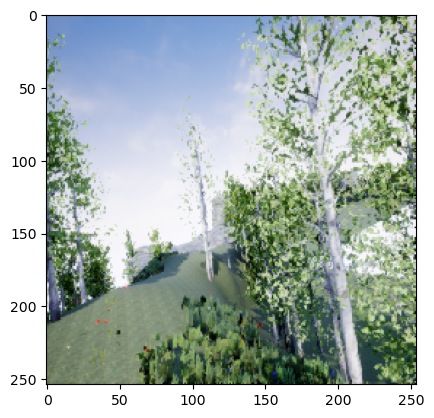

In [4]:
plt.imshow(input_dataset[576]/255)
print(f"Is there any fire -> {output_dataset[576]}")

Is there any fire -> 1


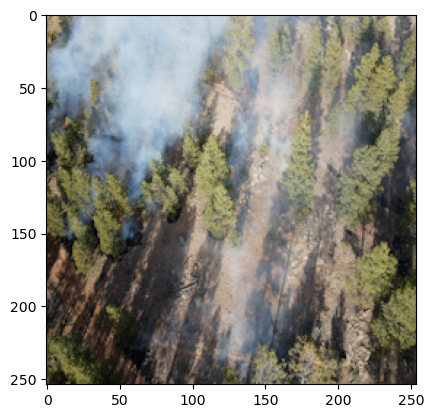

In [5]:
plt.imshow(input_dataset[4000]/255)
print(f"Is there any fire -> {output_dataset[4000]}")

Splitting the dataset into training and testing

In [6]:
x_train, x_test, y_train, y_test = train_test_split(input_dataset, output_dataset, test_size=0.3, random_state=500)

In [7]:
print(f"Dimensions of x train: {x_train.shape}")
print(f"Dimensions of x test: {x_test.shape}")
print(f"Dimensions of y train: {y_train.shape}")
print(f"Dimensions of y test: {y_test.shape}")


Dimensions of x train: (4676, 254, 254, 3)
Dimensions of x test: (2005, 254, 254, 3)
Dimensions of y train: (4676,)
Dimensions of y test: (2005,)


# Implementing Convolutional Neural Network

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same", input_shape=(254, 254, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
model.add(Dense(1, activation="sigmoid"))

In [10]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics="accuracy")

In [11]:
model.fit(x_train, y_train, epochs=12, batch_size= 300)

Epoch 1/12
16/16 [==============================] - 90s 4s/step - loss: 4513.0591 - accuracy: 0.7840
Epoch 2/12
16/16 [==============================] - 74s 5s/step - loss: 51.0835 - accuracy: 0.9904
Epoch 3/12
16/16 [==============================] - 68s 4s/step - loss: 0.2735 - accuracy: 0.9989
Epoch 4/12
16/16 [==============================] - 69s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/12
16/16 [==============================] - 69s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/12
16/16 [==============================] - 69s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/12
16/16 [==============================] - 70s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/12
16/16 [==============================] - 68s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/12
16/16 [==============================] - 73s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/12
16/16 [==============================] - 72s 5s/step - loss: 0.0000e+00 - accu

In [12]:
model.save("Trained_model.h5")

In [16]:
model_reload = tensorflow.keras.models.load_model("Trained_model.h5")

In [17]:
y_pred = model_reload.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 847    0]
 [   0 1158]]
